## Model Discovery and Regression

Recall from our learning on how populations of cells can grow:


- Exponential Growth (cells divide at constant rate): 
    - $\frac{d}{dt} N = rN$
 #
- Logistic Growth (There is a limited carrying capacity $K$): 
    - $\frac{d}{dt} N = rN(1-\frac{N}{K})$
#
- Logistic Growth with Allee Effect (Cells help each other after reaching a critical value $A$):
    - $\frac{d}{dt} N = rN(\frac{N}{A}-1)(1-\frac{N}{K})$
#
- Predator-Prey Model:
    - Cancer, $c$ (*prey*), vs. T-cells, $T$ (*predator*)
        - $\frac{d}{dt} N_C = r_c N_c (1-\frac{N_c}{K_c})-r_{kill} N_T$
        - $\frac{d}{dt} N_T = r_T N_T (1-\frac{N_T}{K_T})+r_{eat} N_c-r_{death}N_T$
#
*But what if we don't know the model a-priori?*



In [ ]:
#Code these differential equations

def ExpGrowth(N,t,r):
    """
    Function which calculates the exponential growth of cells
    Inputs:
        - r, growth rate
        - N, number of cells
        - t, time

    Outputs:
        - dN/dt, growth rate of cells
    """
    dNdt = r*N
    return dNdt

def LogisticGrowth(N,t,r,K):
    """
    Function which calculates the logistic growth of cells
    
    Inputs:
        - r, growth rate
        - N, number of cells
        - K, carrying capacity
        - t, time

    Outputs:
        - dN/dt, growth rate of cells
    """
    dNdt = ExpGrowth(N,t,r) * (1-N/K)
    return dNdt

def AlleeGrowth(N,t,r,K,A):
    """
    Function which calculates the Allee growth of cells
    
    Inputs:
        - r, growth rate
        - N, number of cells
        - K, carrying capacity
        - A, Allee Threshold
        - t, time

    Outputs:
        - dN/dt, growth rate of cells
    """
    dNdt = LogisticGrowth(N,t,r,K) * (N/A-1)
    return dNdt

def PredatorPrey(N, t, r, K, r_eat, r_death, r_kill):
    """
    Function which calculates the predator-prey dynamics of cancer and Tcells
    
    Inputs:
        - t, time
        - r = [r_c, r_T], growth rate of cancer and Tcells
        - N = [N_c, N_T], number of cancer and Tcells
        - K = [K_c, K_T], carrying capacity of cancer and Tcells
        - r_eat, rate at which Tcells eat cancer
        - r_death, rate at which Tcells die out
        - r_kill, rate at which cancer is killed by Tcells

    Outputs:
        - dN/dt = [dN/dt_c, dN,dt_T], growth rate of of cancer and Tcells
    """

    #Unpack the variables
    r_c,r_T = r
    N_c,N_T = N
    K_c,K_T = K

    dNdt_c = LogisticGrowth(r_c,N_c,K_c) - r_kill * N_T
    dNdt_T = LogisticGrowth(r_T, N_T, K_T) + r_eat * N_c - r_death * N_T

    return [dNdt_c, dNdt_T]

# Basic Matrix Algebra

A 3 x 3 matrix looks like the following:

$ {A} = \begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3} \\ a_{2,1} & a_{2,2} & a_{2,3} \\ a_{3,1} & a_{3,2} & a_{3,3} \end{bmatrix}$

An important matrix is the Identity Matrix, **I**. The Identity Matrix is very similar to the number 1, in that when you multiply another matrix by it, on either side, the matrix is unchanged:

${I} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

$ {A} {I} =  {I} {A} = {A} $

Another important matrix property for solving systems of equations is the matrix inverse. 

${A} {A}^{-1} = {A}^{-1} {A} = {I} $

$ ({A}^{-1})^{-1} = {A} $

The matrix inverse is not guarenteed to exist, or be unique. But if it does exist, then the above properties hold true. We need this propery to "cancel out" the ${A}$ on the left-hand side of our general system of equations, and solve for the vector of unknowns, $x$:

${A} x = b$

${A}^{-1} {A} x = {A}^{-1} b$

${I} x = {A}^{-1} b$

$x = {A}^{-1} b$

We multiply both sides by ${A}^{-1}$ on the right, **because matrix multiplication is not commutative**:

${A}{B} \neq {B}{A} $

We will not be covering the [properties of the matrix inverse](https://en.wikipedia.org/wiki/Invertible_matrix) in this course, but I encourage you to learn more. The ability to invert a matrix, and the properties of matrices are very important to many computational and quantitative fields of study, including rapid calculation of statistical properties.

# Matrix Multiplication

Take a matrix ${A}$ and a vector $x$. Let's explicitly write down the components of each:

$ {A} = \begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3} \\ a_{2,1} & a_{2,2} & a_{2,3} \\ a_{3,1} & a_{3,2} & a_{3,3} \end{bmatrix}$

$x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} $

$b = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} $


In our matrix equation, we are asking the question ${A} x = b$, or in plain English, what unknown coefficients $x$ must I multiply the rows in known matrix ${A}$ by, in order to get the known vector $b$. When we multiply matrices together, we take the 

This is equivalent to solving the following system of equations:

$ {A} x = b = \begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3} \\ a_{2,1} & a_{2,2} & a_{2,3} \\ a_{3,1} & a_{3,2} & a_{3,3} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}$

$a_{1,1} x_1 +  a_{2,1} x_2 + a_{3,1} x_3 = b_1$

$a_{1,2} x_1 +  a_{2,2} x_2 + a_{3,2} x_3 = b_2$

$a_{1,3} x_1 +  a_{2,3} x_2 + a_{3,3} x_3 = b_3$


We can solve this by hand, but since we are a computational course, we will use python instead. Let's have a more concrete example:

${A} = \begin{bmatrix} 1 & 2 & -1 \\ 2 & 1 & 2 \\ -1 & 2 & 1 \end{bmatrix}$

$b = \begin{bmatrix} 10 \\ 5 \\ 6 \end{bmatrix}$

Solve the system of equations:

$ {A} x = b = \begin{bmatrix} 1 & 2 & -1 \\ 2 & 1 & 2 \\ -1 & 2 & 1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} 10 \\ 5 \\ 6 \end{bmatrix}$

$1 x_1 +  2 x_2 -1 x_3 = b_1$

$2 x_1 +  1 x_2 + 2 x_3 = b_2$

$-1 x_1 +  2 x_2 + 1 x_3 = b_3$

First, we must solve for the matrix inverse. We will do this python to verify the answer:

${A}^{-1} = \begin{bmatrix} 3/16 & 1/4 & -5/16 \\ 1/4 & 0 & 1/4 \\ -5/16 & 1/4 & 3/16 \end{bmatrix}$

We then multiply both sides of the equation by ${A}^{-1}$ on the left to solve for the unknown coefficients $x$

${A}^{-1} {A} x = {I} x = x = {A}^{-1} b$

$\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} 3/16 & 1/4 & -5/16 \\ 1/4 & 0 & 1/4 \\ -5/16 & 1/4 & 3/16 \end{bmatrix} \begin{bmatrix} 10 \\ 5 \\ 6 \end{bmatrix}$

$x_1 = 10(3/16 + 1/4 -5/16) = 5/4$

$x_2 = 5(1/4 + 0 + 1/4) = 4$

$x_3 = 6(-5/16 + 1/4 + 3/16  ) = -3/4$

Let's verify all of this in code


In [ ]:
import numpy as np

#Verify the above linear algebra using numpy
A = np.asarray([[1,2,-1],[2,1,2],[-1,2,1]])
b = np.asarray([10,5,6])
A_inv = np.linalg.pinv(A) #pinv is short for the pseudo-inverse. 
                          #We use this when we only care about estimating the inverse

print('A_inv = ', np.linalg.pinv(A))
print('A_inv * A = ', np.matmul(A_inv,A))
print('x = A_inv * b = ', np.matmul(A_inv,b))


A_inv =  [[ 1.87500000e-01  2.50000000e-01 -3.12500000e-01]
 [ 2.50000000e-01 -6.49254701e-17  2.50000000e-01]
 [-3.12500000e-01  2.50000000e-01  1.87500000e-01]]
A_inv * A =  [[ 1.00000000e+00  1.11022302e-16  5.55111512e-17]
 [-8.32667268e-17  1.00000000e+00 -1.66533454e-16]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
x = A_inv * b =  [ 1.25  4.   -0.75]


# Refactoring our equations for Matrix Algebra

Normally, when we write our equations or models, we like our terms to be factored, because we know each term behaves a certain way, and we can generalize the forms of these models. For instance, see above how factoring our equations made the above code extremely easy to write. We only made small modifications to simpler models.

However, what if we don't know the models *a priori*?

In general, most of the ODEs we examine are of the form:

$\frac{d}{dt} y = f(y)$

where:

$f(y) = \sum_{n=0}^{N}a_n y^n$

# For Example:

- Exponential Growth becomes
    - $\frac{d}{dt} N = a_1 N^1$
        - where $r = a_1$
#
- Logistic Growth becomes
    - $\frac{d}{dt} N = a_2 N^2 + a_1 N^1$
        - where $a_2 = -\frac{r}{K}$
#
- Allee Growth becomes
    - $\frac{d}{dt} N = a_3 N^3 + a_2 N^2 + a_1 N^1$
        - where: 
            - $a_3 = -\frac{r}{KA}$
            - $a_2 = r\frac{K+A}{KA}$
            - $a_1 = r$

- And our simple predator-prey example becomes:
    - $\frac{d}{dt} N_c = a_2^c N_c^2 + a_1^c N_c^1$
    - $\frac{d}{dt} N_T = a_2^T N_T^2 + a_1^T N_T^1 + a_1^{T,C} N_C$
        - where:
            - $a_2^c = -\frac{r_c}{K_c}$
            - $a_1^c = r_c - r_{kill}$
            - $a_2^T = -\frac{r_T}{K_T}$
            - $a_1^T = r_T - r_{death}$
            - $a_1^{T,C} = r_{eat}$

The factored form allows for us to mentally understand the differential equation. In contrast, the expanded polynomial form allows for us to use a common data science tool for model discovery: **regression**. This is a key tool if we don't already know the model a priori, or even if we don't have a good guess. Most common ODEs are of polynomial form when expanded.

# Regression

Let's look again at Exponential Growth:

$\frac{d}{dt} N = rN$

Remember, the term regression refers to a linear fit of all the terms to a single output. In general, the regression problem looks like:

${A}x = b$, where ${A}$ is a matrix of known coefficients, $x$ is a column vector of _unknown_ coefficients, and $b$ is our known quantity that we are trying to fit.

In the case of Exponential Growth, the form of the equation is identical to that of a simple line:

$y=mx$

This means we can use simple regression models to estimate the growth rate of our data!

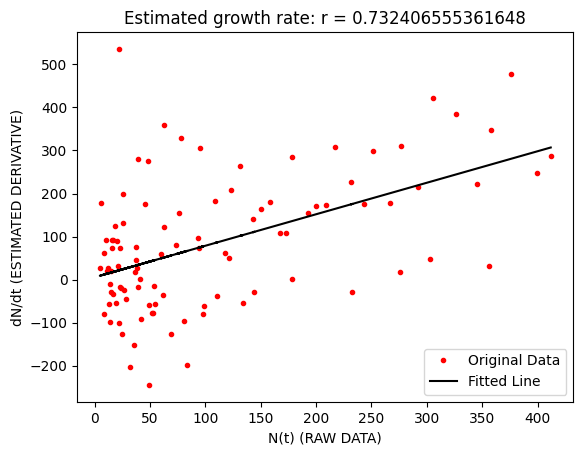

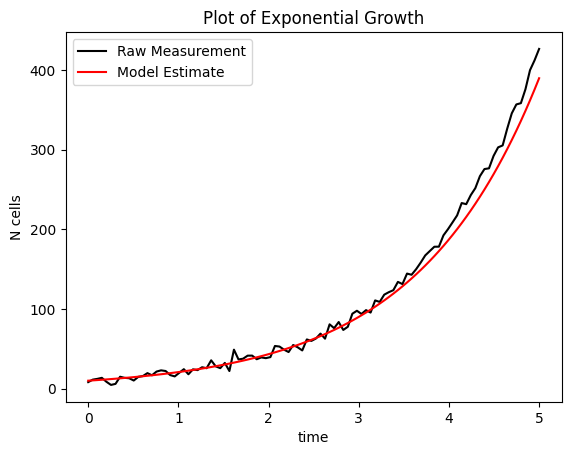

In [22]:
#import our necessary libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import stats

def SolveODE(model, IC, params, n = 1000):
    """
    Solve a generic ODE Model (single species)
    
    Inputs:
        - model, a function handle
        - IC, the initial condition
        - params, tuple of params (e.g (2))

    Outputs:
        - N_of_t, the integrated time trajectory of the model
    """
    t = np.linspace(0,5,n)
    N_of_t = odeint(model,  #the model
                    IC,     #the number of cells in each well
                    t,      #time
                    args=params #model parameters
                    )
    return N_of_t.squeeze()

def AddNoise(signal, sigma = 5):
    """
    Add random noise to the curve to simulate data
    
    Inputs:
        - signal, np array of the smooth simulated data

    Outputs:
        - noisy_signal, np array with random noise added
    """
    return signal + sigma * np.random.randn(len(signal),1).squeeze()

def EstimateDerivative(t, data):
    """
    Estimate the derivative at each data point using Forward Finite Difference
    
    Inputs:
        - t, the time interval
        - data, np array of the data

    Outputs:
        - estimated_derivative
    """
    data_forward = np.roll(data, -1)
    delta_t = (t.max()-t.min())/len(t)
    estimated_derivative = (data_forward - data)/delta_t
    estimated_derivative[-1] = np.nan
    return estimated_derivative


def RegressionPlot(data,derivative, plot = True):
    """
    Performs the regression and plots the data with its derivative, assuming it is of the form:

        dN/dt = rN

        equivalent to

        y = mx

    Inputs:
        - data, np array of the data
        - derivative, the estimated derivative
        - plot, a flag for whether or not to plot the results

    Outputs:
        - None
    """
    #Perform the regression
    regression = stats.linregress(data, derivative)
    #Plot the raw data
    if plot:
        plt.plot(data, derivative, 'r.', label = 'Original Data')
        plt.plot(data, regression.intercept + regression.slope*data,'k-',label = 'Fitted Line')
        plt.title('Estimated growth rate: r = ' + str(regression.slope))

        plt.ylabel('dN/dt (ESTIMATED DERIVATIVE)')
        plt.xlabel('N(t) (RAW DATA)')
        plt.legend()
        plt.show()
    return regression.slope

#Generate the Time vector
n = 100
t = np.linspace(0,5,n)

#Get the noisy data
noisy_data = AddNoise(SolveODE(model = ExpGrowth, IC = 10, params = (0.75,), n = n ), sigma = 5)

#Plot it and the regression results
est_rate = RegressionPlot( noisy_data[:-1], EstimateDerivative(t,noisy_data)[:-1] ) 

plt.plot(t,noisy_data, 'k', label = 'Raw Measurement')
plt.plot(t,SolveODE(model = ExpGrowth, IC = 10, params = (est_rate,), n = n ), 'r', label = 'Model Estimate')
plt.xlabel('time')
plt.ylabel('N cells')
plt.title('Plot of Exponential Growth')
plt.legend()
plt.show()

# Model regression using Matrices

We have now seen that we can find rough coefficients through linear regression using the data we measure. Now, let's expand this example to a case with polynomial terms: logistic growth. 

Recall:

- Logistic Growth (There is a limited carrying capacity $K$): 
    - $\frac{d}{dt} N = rN(1-\frac{N}{K}) = a_2 N^2 + a_1 N^1$
        - where:
            - $a_1 = r$
            - $a_2 = -\frac{r}{K}$

We will then set up our regression:

${A} x = b$

$\begin{bmatrix} | & | \\ N(t) & N^2(t) \\ | & | \end{bmatrix} \begin{bmatrix} r \\ -\frac{r}{K} \end{bmatrix}  = \begin{bmatrix} | \\ \frac{dN}{dt} \\ | \end{bmatrix}$

We will tackle this problem next week in code!

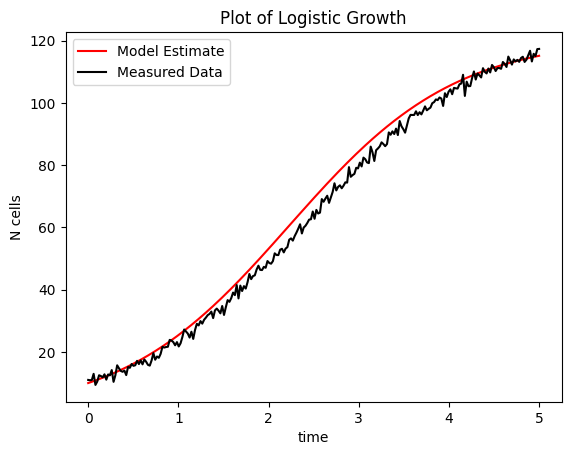

True parameters:  (1, 125)
Estimated parameters:  (1.0813945419717614, 120.85234596291006)


In [29]:
n = 250
t = np.linspace(0,5,n)
r_true = 1
K_true = 125

params_true = (r_true, K_true)

#Get the noisy data
noisy_data = AddNoise(SolveODE(model = LogisticGrowth, IC = 10, params = params_true, n = n ), sigma = 1.25)

#Estimate the derivative
b = EstimateDerivative(t,noisy_data)[:-1]

#Create our library matrix
A = np.asarray([noisy_data[:-1], (noisy_data[:-1])**2]).T
A_inv = np.linalg.pinv(A) #solve for the pseudo-inverse

x_est = np.matmul(A_inv,b)

r_est = x_est[0]
K_est = -r_est/x_est[1]

params_est = (r_est, K_est)

plt.plot(t,SolveODE(model = LogisticGrowth, IC = 10, params = params_est, n = n ), 'r', label = 'Model Estimate')
plt.plot(t,noisy_data, 'k', label = 'Measured Data')
plt.xlabel('time')
plt.ylabel('N cells')
plt.title('Plot of Logistic Growth')
plt.legend()
plt.show()

print('True parameters: ', params_true)
print('Estimated parameters: ', params_est)


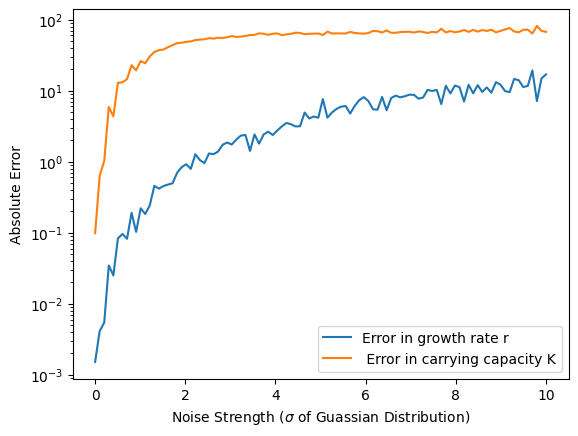

In [ ]:
#Investigating the error w.r.t. noise level

def absolute_error(params_true,params_est):
    """
    Calculate the absolute error of parameters
    """
    return abs( (params_est - params_true) )

def LogisticGrowthRegression(params_true, sigma = 1, n = 1000, IC = 10):
    """
    Perform regression on a logistic growth dataset, 
    given a noise strength, number of datapoints, and the initial condition

    Inputs:
        - params_true, the true logistic growth model parameters
        - sigma, the noise strength
        - n, the number of time samples
        - IC, the model initial condition

    Outputs:
        - params_est, the estimated parameters
    """
    t = np.linspace(0,5,n)
    noisy_data = AddNoise(SolveODE(model = LogisticGrowth, IC = IC, params = params_true, n = n ), sigma = sigma)
    b = EstimateDerivative(t,noisy_data)[:-1]
    A = np.asarray([noisy_data[:-1], (noisy_data[:-1])**2]).T
    A_inv = np.linalg.pinv(A)
    x_est = np.matmul(A_inv,b)
    r_est = x_est[0]
    K_est = -r_est/x_est[1]
    params_est = np.asarray([r_est, K_est])

    return params_est

sigmas = np.linspace(0.001, 10, 100)
params_true = (0.75, 125)

errs = []
for sigma in sigmas:
    err = absolute_error(np.asarray(params_true), LogisticGrowthRegression(params_true, sigma = sigma))
    errs.append(err)

errs = np.asarray(errs)
plt.semilogy(sigmas, errs, label = ['Error in growth rate r',' Error in carrying capacity K'])
plt.legend()
plt.xlabel('Noise Strength ($\sigma$ of Guassian Distribution)')
plt.ylabel('Absolute Error')
plt.show()


# Exercise notes

We can see that this method does a decent job of estimating our parameters, assuming we have enough data, and not a lot of noise. But what if we guess the wrong model?

What if we expect to see something complicated like Allee Growth, but the true underlying model is actually something simpler like logistic growth?

Let's invesitgate

In [ ]:
def AlleeGrowthRegression(params_true, sigma = 1, n = 1000, IC = 10):
    """
    Perform regression on a *logistic growth dataset*, given the *assumption of Allee Growth*,
    given a noise strength, number of datapoints, and the initial condition

    Inputs:
        - params_true, the true logistic growth model parameters
        - sigma, the noise strength
        - n, the number of time samples
        - IC, the model initial condition

    Outputs:
        - params_est, the estimated parameters of logistic growth, and the raw term coefficients
    """
    t = np.linspace(0,5,n)
    #WE ARE INCLUDING ALLEE TERMS IN REGRESSION, BUT THE MODEL is still LOGISTIC GROWTH
    noisy_data = AddNoise(SolveODE(model = LogisticGrowth, IC = IC, params = params_true, n = n ), sigma = sigma)
    b = EstimateDerivative(t,noisy_data)[:-1]
    #We are adding an N^3 column to account for the Allee Term                v
    A = np.asarray([noisy_data[:-1], (noisy_data[:-1])**2, (noisy_data[:-1])**3]).T 
    A_inv = np.linalg.pinv(A)
    x_est = np.matmul(A_inv,b)
    r_est = x_est[0]
    K_est = -r_est/x_est[1]
    params_est = np.asarray([r_est, K_est])
    return [params_est, x_est]

params_true = (0.75, 75)

[params_est, x_est] = AlleeGrowthRegression(params_true, sigma = 1, n = 250, IC = 10)

print(params_true)
print(params_est)
print(x_est)


(0.75, 75)
[ 0.89733474 70.68810268]
[ 8.97334738e-01 -1.26942824e-02 -1.29502550e-05]


What happened? We assumed our data was Allee Growth, which is a larger model family than logistic growth. Why did we get a negative carrying capacity? And why is that last term non-zero?

It turns out, when we use this approach, there are multiple ways to combine our data to reconstruct the derivative. This is because of the shape of the error function, $L_2$, or summed-squared error (SSE), and what the objective function is trying to do:

When we solve the system of equations:

$A x = b$ by the process of matrix inversion $x = A^{-1} b$,

we are actually telling the computer to find the value of $x$ which makes the following equation as close to true as possible:

$(x-A^{-1}b)^2 = 0$

or represented explicitly:

$ (x-A^{-1}b)^2 = 0 = \left( \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} - A^{-1}  \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} \right) ^2 = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}$

This is the $L_2$ Norm, or the Summed Squared error, which looks like this:

$J_{L_2} = \sum_{j=1}^{M} \sum_{i=1}^{N}(b_i - A_i x_j)^2$,

where $y_i$ is the data we measured, $X_i$ is our estimator,$w$ is the weight, $N$ is the number of datapoints measured, and $M$ is the number of entries in our library. 

This objective only cares about how well our model fits the data. It doesn't care at all about making sure we don't over-complicate our assumptions.

To help us, we can add in another term to our $L_2$ regression term, to help us turn off terms we don't care about. This is called LASSO regression:

$J_{LASSO} = \sum_{j=1}^{M} \sum_{i=1}^{N} \left[(b_i - a_i x_j)^2 + \alpha||x_j||_1 \right]$, 

where $||\cdot||_1$ is the simple absolute value operator, and $\alpha$ is a weight which forces the model to use smaller and smaller values for the weights on each column in the regression. 


# SINDy: Sparse Identification of Nonlinear Dynamics

Now we have all the building blocks to understand a model discovery paradigm called SINDy.

SINDy uses function regression, like we used above, to determine the rate at which something is growing. SINDy gets around the problem of picking too many terms by including a different objective function.

It allows us to estimate an **expanded form model**:

$\frac{d}{dt} y = f(y)$

where

$f(y) = x_1 y + x_2 y^2 + x_3 y^3 + ... + x_M y^M$

We use a LASSO regressor to ensure most of the values of $x_1, ..., x_M$ are ZERO. The below equation is the matrix equation for SINDy, when it is assumed we are using a LASSO objective function

$\begin{bmatrix} | & | & | & | \\ N(t) & N^2(t) & ... & N(t)^M \\ | & | & | & | \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ ... \\ x_M \end{bmatrix}  = \begin{bmatrix} | \\ \frac{dN}{dt} \\ | \end{bmatrix}$

After determining one or multiple candidate models, it is up to the researcher to then interpret the models returned and generate tests and hypotheseses to further investigate the dynamics.

Let's see it in action:

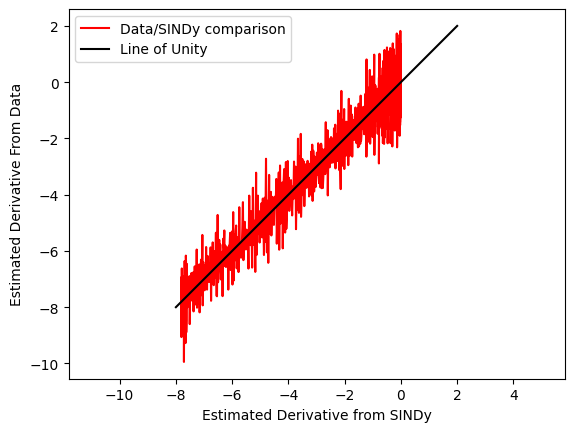

[-1.47567847  0.0694276   0.          0.          0.        ]


In [28]:
from sklearn.linear_model import Lasso
import warnings

def SINDyRegression(t, data, library_length = 5, lasso_alpha = 1, threshold = 10E-4, additional_terms = None):
    """
    Perform a SINDy Model regression and return the matrix of model coefficients

    Inputs:
        - t, time vector
        - data, the measured data
        - library_length, the number of polynomial terms in our library
        - lasso_alpha, the value of the Sparsity-Enforcing parameter
        - threshold, the lower-bound at which to set model parameters to 0
        - additional_terms, a list of additional model terms we may want to include in the model

    Outputs:
        - coefs, the raw coefficients for the expanded polynomial ODE discovered
        - estimation, the estimated derivative using Matrix Alegebra for comparison to the data 

    """
    warnings.filterwarnings('ignore')
    b = EstimateDerivative(t, data)[:-1]

    library_terms = []
    for i in range(library_length):
        library_terms.append((data[:-1])**(i+1))

    if additional_terms:
        for term in additional_terms: library_terms.append(term)
 
    library = np.asarray(library_terms).T

    LassoRegressor = Lasso(alpha = lasso_alpha, fit_intercept = False)

    x_est = LassoRegressor.fit(library,b)
    coefs = x_est.coef_
    less_than_threshold = np.abs(coefs) < threshold
    coefs[less_than_threshold] = 0

    estimation = np.matmul(library,coefs)

    return [coefs,estimation]

IC = 50
true_params = (1.5, 75,25)
n = 1000

t = np.linspace(0,5,n)

data = AddNoise( SolveODE(model = AlleeGrowth, IC = 10, params = true_params, n = n), sigma = 0.0025 )

x_est, estimation = SINDyRegression(t,data,library_length=5,lasso_alpha=0.001)

plt.plot(estimation, EstimateDerivative(t,data)[:-1],'r', label = 'Data/SINDy comparison')
plt.plot([-8,2],[-8,2],'k', label = 'Line of Unity')
plt.xlabel('Estimated Derivative from SINDy')
plt.ylabel('Estimated Derivative From Data')
plt.axis('equal')
plt.legend()
plt.show()

print(x_est)

# Pareto Front Analysis: Ensuring our models are Sparse

From the above, we can see that the SINDy methodology gives us the expanded form of models with the correct number of coefficients, but how do we know where to set $\alpha$ for the LASSO regression?

It is an art, but if we truly don't have an idea, we can always plot it, and count the number of terms in each model.

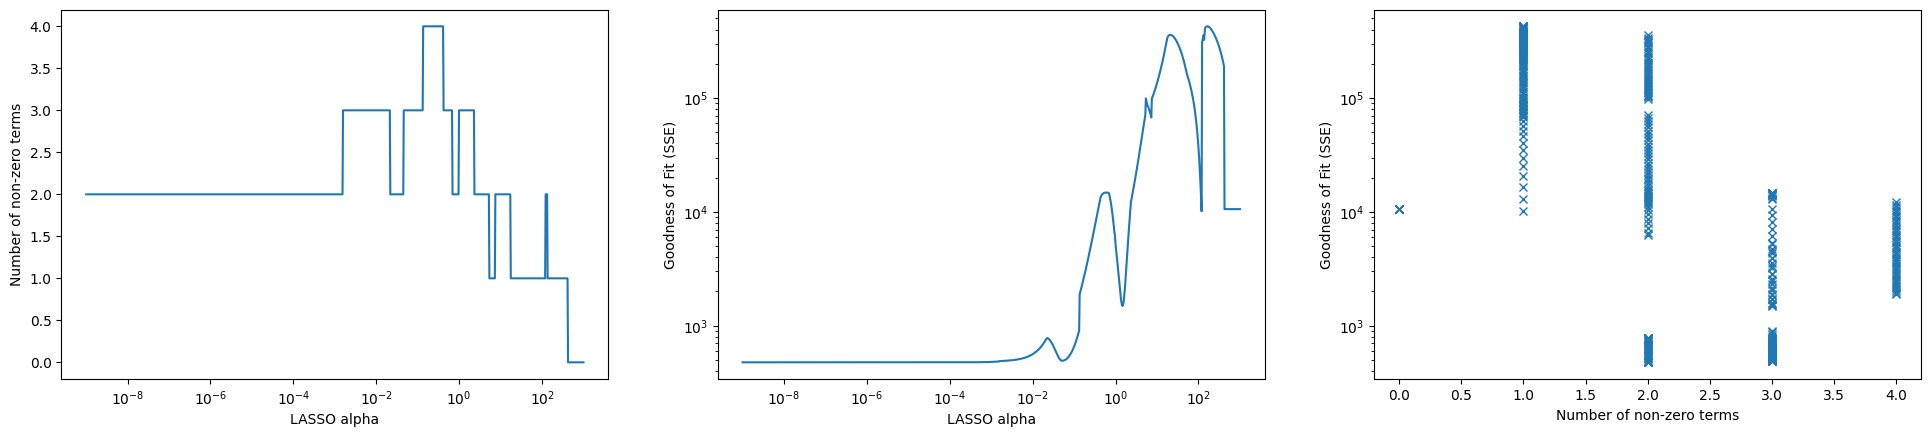

In [ ]:
alphas = np.logspace(-9,3,1000)

n_coeffs = []
SSEs = []

data = AddNoise( SolveODE(model = AlleeGrowth, IC = 10, params = true_params, n = n), sigma = 0.0025 )
#data = SolveODE(model = AlleeGrowth, IC = 10, params = true_params, n = n)

est_derivative = EstimateDerivative(t,data)[:-1]

for alpha in alphas:
    x_est, estimation = SINDyRegression(t,data,library_length=10,lasso_alpha=alpha)
    n_coeffs.append(np.count_nonzero(x_est))
    SSEs.append( np.sum(( est_derivative- estimation)**2) )

n_coeffs = np.asarray(n_coeffs)
SSEs = np.asarray(SSEs)

fig, ax = plt.subplots(1,3)
fig.set_figwidth(72)
fig.set_figwidth(24)
plt.subplot(1,3,1)

plt.semilogx(alphas,n_coeffs)
plt.xlabel('LASSO alpha')
plt.ylabel('Number of non-zero terms')

plt.subplot(1,3,2)
plt.loglog(alphas,SSEs)
plt.xlabel('LASSO alpha')
plt.ylabel('Goodness of Fit (SSE)')

plt.subplot(1,3,3)
plt.semilogy(n_coeffs,SSEs, marker = 'x', linestyle = 'None')
plt.xlabel('Number of non-zero terms')
plt.ylabel('Goodness of Fit (SSE)')

plt.show()


# Pareto Plot Summary

To interpret the Pareto Front Analysis, and select a good candidate model, we must look at each plot individually to tell us what is going on.


In the first plot, we are looking at the strength of the sparsity-enforcing term $\alpha$ vs the number of nonzero terms. From the first plot, we can see that the number of model terms stays at 2 when $\alpha$ is very low. Conversely, when $\alpha$ is large, we see the model drop down to 0 terms, or a constant value. We want to look at regions where lots of change is happening to tell us if our model is too complicated or too simple.

The second plot tells us how accurate our model estimate is w.r.t the associated sparesity parameter. First, we notice that as $\alpha$ increases, at a large scale, our models have more error. However, we see certain vallies in this function, which tell us of potential models which might fit out data well. If we overlaid this plot with the second plot, it would tell us how many terms each of the models have, and how well that model fits the data. From the first hump and subsequent well in model 2, we can tell that there is increased error when adding a 3rd model term in, but there may be certain regions where a 2-term mode and a 3-term model fit equivalently well.

The 3rd and final plot shows us the distribution of model complexity and their respective error. We see that all models with 0 and 1 term are highly inaccurate. Likewise, we see that models with 3 terms are also inaccurate with respect to the other models in the analysis. At 2 and 3 models, we see two different populations: a high-error population and a low-error population.

Recall that we used an Allee Effect Model (3 terms) to generate these candidate models. From this analysis, we can see that a 2-parameter model (likely logistic growth) in some cases actually fits the data better than the Allee Effect. This is likely due to the presence of noise. And if we removed the noise completely, we would see that 3-parameter models fit the data the best. However, it is important to note that give our data quality, we want to have the simplest model possible.

We may want to pick the most-accurate 2-term model and the most-accurate 3-term model and compare the two using another criteria. This is a teaser for next week, with Dr. Rodin.